## $k$-nearest neighbors

In [1]:
# random data generation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n=50
np.random.seed(20)
x=np.random.rand(n)-0.5
y=np.random.rand(n)-0.5
train=pd.DataFrame(data={'x':x,'y':y})

### (1) 위의 생성한 데이터 중에서 (0,0)의 10 nearest neighbor를 찾으시오. 10 nearest neighbor의 python 기준의 index를 쓰시오.

In [4]:
train.head()

,x,y
0,0.088131,0.234301
1,0.397714,-0.091357
2,0.391531,0.278688
3,0.315837,0.303971
4,-0.464110,0.286071


In [9]:
train['distance'] = np.sqrt(x**2+y**2)

In [13]:
train.sort_values('distance').index.values[:10]

array([45, 29, 47, 26,  7,  8, 25,  6,  5, 37])

### (2) 전체 데이터와 (0, 0)에 대한 scatter plot을 그리시오. 이 때 (0,0)은 무작위로 생성한 데이터와 구분되도록 하고, 10 nearest neighbor의 경우에도 nearest neighbor가 아닌 포인트와 구분되도록 scatter plot을 그리시오. (색이나 모양으로 구별)

In [16]:
idx_knn = train.sort_values('distance').index.values[:10]
idx_others = train.sort_values('distance').index.values[10:]

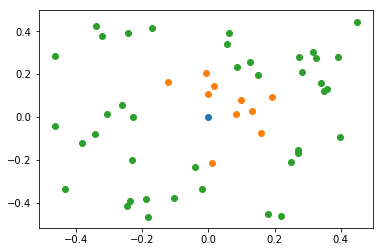

In [19]:
plt.scatter(0,0)
plt.scatter(x[idx_knn], y[idx_knn])
plt.scatter(x[idx_others], y[idx_others])

### (3) 기존 데이터에서 y축의 값을 5배한 다음에 다시 (0,0)의 10 nearest neighbor를 찾으시오. 이 때 거리는 유클리디안 거리를 사용하고 10 nearest neighbor의 python 기준의 index를 쓰시오.

In [20]:
train['y_re'] = train['y']*5

In [21]:
train.head()

,x,y,distance,y_re
0,0.088131,0.234301,0.250327,1.171503
1,0.397714,-0.091357,0.408071,-0.456783
2,0.391531,0.278688,0.480586,1.393440
3,0.315837,0.303971,0.438351,1.519853
4,-0.464110,0.286071,0.545193,1.430357


In [22]:
train['distance_re'] = np.sqrt(x**2+train['y_re']**2)

In [23]:
train.head()

,x,y,distance,y_re,distance_re
0,0.088131,0.234301,0.250327,1.171503,1.174813
1,0.397714,-0.091357,0.408071,-0.456783,0.605662
2,0.391531,0.278688,0.480586,1.393440,1.447401
3,0.315837,0.303971,0.438351,1.519853,1.552323
4,-0.464110,0.286071,0.545193,1.430357,1.503769


In [25]:
train.sort_values('distance_re').index.values[:10]

array([45, 26, 10,  9, 18,  8, 47,  5, 15, 49])

### (4) y축의 값을 5배한 데이터와 (0, 0)에 대한 scatter plot을 그리시오. 이 때 (0,0)은 무작위로 생성한 데이터와 구분되도록 하고, 10 nearest neighbor의 경우에도 nearest neighbor가 아닌 포인트와 구분되도록 scatter plot을 그리시오. (색이나 모양으로 구별) y축의 값을 변경한 후 어떻게 달라졌는지 쓰시오.

In [26]:
idx_knn = train.sort_values('distance_re').index.values[:10]
idx_others = train.sort_values('distance_re').index.values[10:]

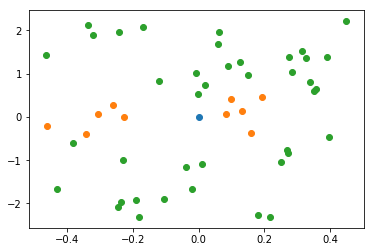

In [28]:
plt.scatter(0,0)
plt.scatter(x[idx_knn], train['y_re'][idx_knn])
plt.scatter(x[idx_others], train['y_re'][idx_others])

## Decision tree

### (1) decision tree를 학습하는 단계에서 overfitting을 막기 위해서 여러 parameter를 이용하는데 어떤 조합이 가장 좋은지 stratified k-fold cross-validation을 이용해서 알아보고자 한다.  변경하고자 하는 옵션은 max_depth, min_samples_split, min_samples_leaf 이고 사용하게 될 값은 다음과 같다. 
- max_depth=[3, 4]
- min_samples_split=[100, 200, 300]
- min_samples_leaf=[50, 100]

### 위의 세 옵션에 대해서 5-fold cross-validation을 정확도를 기준으로 수행한다고 했을 때 아래 표에 각 validation step마다 validation set에 의한 정확도를 채우시오.

### (2) 평균적으로 가장 정확도가 높은 조건으로 전체 데이터를 이용해서 decision tree를 학습하고 그 결과 tree를 그리시오. 

## Naive Bayes

### (1) sklearn.model_selection.train_test_split을 이용해서 데이터를 train set과 test set (validation set)으로 나누고자 한다. 먼저 주어진 데이터를 불러와 input에 해당하는 X와 output 값만 담고 있는 y 변수를 생성하고 여기서부터 train_test_split를 이용해서 Xtrain, Xtest, ytrain, ytest를 얻으시오. 이 때 test_size=0.2, stratify=y, random_state=150으로 설정하시오. Xtrain에 들어있는 데이터 중 맨 위에 있는 5개 데이터와 Xtest에 들어있는 데이터 중 맨 위에 있는 5개 데이터를 jupyter notebook 화면에 print하시오. 

### (2) Multinomial naïve Bayes 모형을 이용해서 세팅이 변경없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오.

### (3) 학습된 Multinomial naïve Bayes 모형으로부터 서로 다른 두 group(스팸 SMS와 스팸이 아닌 SMS)일 확률을 높이는데 가장 기여를 많이 하는 단어 상위 10개씩을 찾으시오. 

### (4) 학습된 Multinomial naïve Bayes 모형에서 서로 다른 두 group에 대해서 개별 단어의 $p_i  (i=\{1,…,175\})$ 값들의 히스토그램을 그리시오. 이 때 히스토그램을 그리기 위한 막대의 수는 30으로 하시오. 

### (5) Bernoulli naïve Bayes 모형을 이용해서 세팅 변경 없이 train set으로 학습을 하고 test set을 이용해서 정확도(accuracy), recall, precision, f1 measure 값을 구하시오. (2)의 결과와 비교하여 어느 쪽이 더 나은 모형인지 설명하시오. 이 결과로부터 알 수 있는 사실은 무엇인가?